# COGS 108 - Final Project 

# Overview

In this study, I will look into what kind of public space in terms of parks or recreational facilities does the people of San Diego like more and use more to better inform the Parks and Rec department of San Diego of the public’s preferences. This analysis will be done with data collected from Yelp. Through analysis of Yelp data, I concluded that there is no statistically significant difference between the sentiment toward the parks and recreational facilities of San Diego and their ratings. However, many of the reviews are for parks and could indicate that people may use parks more than recreational centers. 

# Name & GitHub ID

- Name: Jun Xian Rao
- GitHub Username: johyrao

# Research Question

Do people use parks with more greenery that allow them to relax or recreational centers that provide them with exercising equipment more? 

## Background and Prior Work

To better inform the park and recreation department of San Diego I want to look into what kinds of parks do people prefer. Do people want parks with more nature and green spaces or do they want parks that are more like activity centers? For me this comes down to does the person prefers to have a more active lifestyle or a more relaxed way of life. The appeal of a recreational center with ball courts and playgrounds promotes a more active lifestyle while also being able to provide spaces for social activities. It is much easier for people to exercise at a recreational center because they don’t need to worry about the immense cost of fitness equipment or gym membership. Having ball courts also garner interactions between members of the community as they get to participate in team sports which enforces a sense of community. On the other hand, a park with more greenery and nature allows a space for people to relax and enjoy nature while still being close to their neighborhood and therefore more accessible. While does not provide people with room to play some sports, it still allows for other sports that have fewer equipment needs like a game of frisbee tag. 

In my research, I found that San Diego has about 400+ regional and open space parks, 57 recreational centers, 13 pools, and 7 skate parks. Showing that there are significantly more parks than parks that are more activity-centric. I also want to know how these public spaces influence our daily lives and the community. I found that nature has a lot of benefits to our physical and emotional health. In a Times article, it said that "nature can provide stress relief, increase social interaction, encourage physical exercise, and even help soothe mental illness." Meaning that green spaces in our parks can allow people to interact more with nature and thereby help them release some stress from their everyday urban life. Not only does nature parks benefit our health, but it also helps with increasing the health of the community spaces. In an article from climateforhealth.org, it states that "Green infrastructure is the natural and built green spaces that use nature and natural processes to manage a variety of challenges, including water quality, flood risk, and air quality and temperature, which in turn can improve human health." This means that greener park helps improve the health of the environment, the community, and our health. These articles provide strong cases for parks with more green spaces and thus we need to put to understand what public opinion lies, what kinds of parks they like and therefore use, and what policymakers should do to promote personal and community health through parks. 

References (include links):
- 1)https://time.com/collection/guide-to-happiness/4881665/green-spaces-nature-happiness/
- 2)https://climateforhealth.org/greener-parks-are-a-quality-of-life-benefit/
- 3)https://www.sandiego.gov/park-and-recreation/general-info

# Hypothesis


People will use nature parks more than the recreational center as they are more general use than recreational centers. They would also have better reviews than recreational centers because they have a less defined purpose. 

# Dataset(s)

San Diego Park Yelp Data (Review and Parks)
Name: yelp_SD_reviews.csv
Link: https://www.yelp.com/developers/documentation/v3/business_reviews
Number of observations: 2333
The reviews dataset holds data on what kind of reviews and rating is given to a San Diego park on Yelp. 

Name: yelp_SD_parks.csv
Link: https://www.yelp.com/developers/documentation/v3/business_search
Number of observations: 833
The park dataset holds the information about parks that appear on the review dataset and their ratings and also general locational and contact info.


# Setup

In [170]:
# pandas and matplotlib setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

In [218]:
#Import the two sheet that I need
yelp_review = pd.read_csv("~\Desktop\COGS108\individual_fa20\data\yelp_SD_reviews.csv")
yelp_parks = pd.read_csv("~\Desktop\COGS108\individual_fa20\data\yelp_SD_parks.csv")

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johyr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johyr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johyr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data Cleaning

Describe your data cleaning steps here.

In [219]:
#Get rid of unneccessary info in the park sheet
yelp_parks = yelp_parks.drop(['address', 'phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'], axis=1)

Get rid of other things on the review and park data so we can focus on the park and rec

In [220]:
yelp_review_no_other = yelp_review
yelp_park_no_other = yelp_parks

for p in range(len(yelp_parks['name'])):
    name = yelp_parks.iloc[p,0]
    if "Park" in name:
        continue
    elif 'Recreational Center' in name:
        continue
    elif 'Recreational Centre' in name:
        continue
    elif 'Rec Center' in name:
        continue
    elif 'Playground' in name:
        continue
    elif 'Coummunity Center' in name:
        continue
    elif 'Parker' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Massage' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Optometry' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Safari Park' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Produce' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Nursery' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    else:
        yelp_park_no_other = yelp_park_no_other.drop(p)

for p in range(len(yelp_review['id'])):
    name = yelp_review.iloc[p,0]
    if "Park" in name:
        continue
    elif 'Recreational Center' in name:
        continue
    elif 'Recreational Centre' in name:
        continue
    elif 'Rec Center' in name:
        continue
    elif 'Playground' in name:
        continue
    elif 'Coummunity Center' in name:
        continue
    elif 'Parker' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Massage' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Optometry' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Safari Park' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Produce' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    elif 'Produce' in name:
        yelp_park_no_other = yelp_park_no_other.drop(p)
    else:
        yelp_review_no_other = yelp_review_no_other.drop(p)

In [221]:
#Assign park or rec classification to a space
yelp_park_no_other['type'] = yelp_park_no_other['name']
yelp_review_no_other['type'] = yelp_review_no_other['id']
yelp_park_no_other

,name,rating,review_count,type
0,Balboa Park,5.0,2105,Balboa Park
1,Civita Park,4.5,46,Civita Park
2,Waterfront Park,4.5,242,Waterfront Park
3,Trolley Barn Park,4.5,102,Trolley Barn Park
4,Bay View Park,5.0,42,Bay View Park
...,...,...,...,...
820,Spreckels Park,4.5,24,Spreckels Park
821,Pioneer Park,3.5,16,Pioneer Park
822,Capehart Dog Park,3.0,85,Capehart Dog Park
830,Petco Park,4.0,1667,Petco Park


In [222]:
for p in range(len(yelp_park_no_other['type'])):
    name = yelp_park_no_other.iloc[p,0]
    if 'Centre' in name:
        yelp_park_no_other.iloc[p,3] = 'Rec'
    elif 'Center' in name:
        yelp_park_no_other.iloc[p,3] = 'Rec'
    elif 'Playground' in name:
        yelp_park_no_other.iloc[p,3] = 'Rec'
    elif 'Skate' in name:
        yelp_park_no_other.iloc[p,3] = 'Rec'
    else:
        yelp_park_no_other.iloc[p,3] = 'Park'
        
for b in range(len(yelp_review_no_other['type'])):
    
    name = yelp_review_no_other.iloc[b,0]
    
    if 'Recreational Center' in name:
        yelp_review_no_other.iloc[b,3] = 'Rec'
    elif 'Recreational Centre' in name:
        yelp_review_no_other.iloc[b,3] = 'Rec'
    elif 'Rec Center' in name:
        yelp_review_no_other.iloc[b,3] = 'Rec'
    elif 'Playground' in name:
        yelp_review_no_other.iloc[b,3] = 'Rec'
    elif 'Skate' in name:
        yelp_review_no_other.iloc[b,3] = 'Rec'
    else:
        yelp_review_no_other.iloc[b,3] = 'Park'

In [225]:
#Get the number of parks and rec
count_park = 0
count_rec = 0

for s in yelp_park_no_other['type']:
    if s == 'Park':
        count_park = count_park + 1
    else:
        count_rec = count_rec + 1
        
print(count_park, count_rec)
yelp_review_no_other
pd.unique(yelp_review_no_other['type'])

260 17


array(['Park', 'Rec'], dtype=object)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [267]:
# Compare number of reviews and ratings of park vs rec
df_park = yelp_park_no_other[yelp_park_no_other['type'] == 'Park']
df_rec = yelp_park_no_other[yelp_park_no_other['type'] == 'Rec']
review_count_rec = sum(df_rec['review_count'])
review_count_park = sum(df_park['review_count'])
mean_rate_park = np.mean(df_park['rating'])
mean_rate_rec = np.mean(df_rec['rating'])

print(review_count_park, review_count_rec)

21912 293


Text(0.0, 1.0, 'How many reviews are there for each types of park')

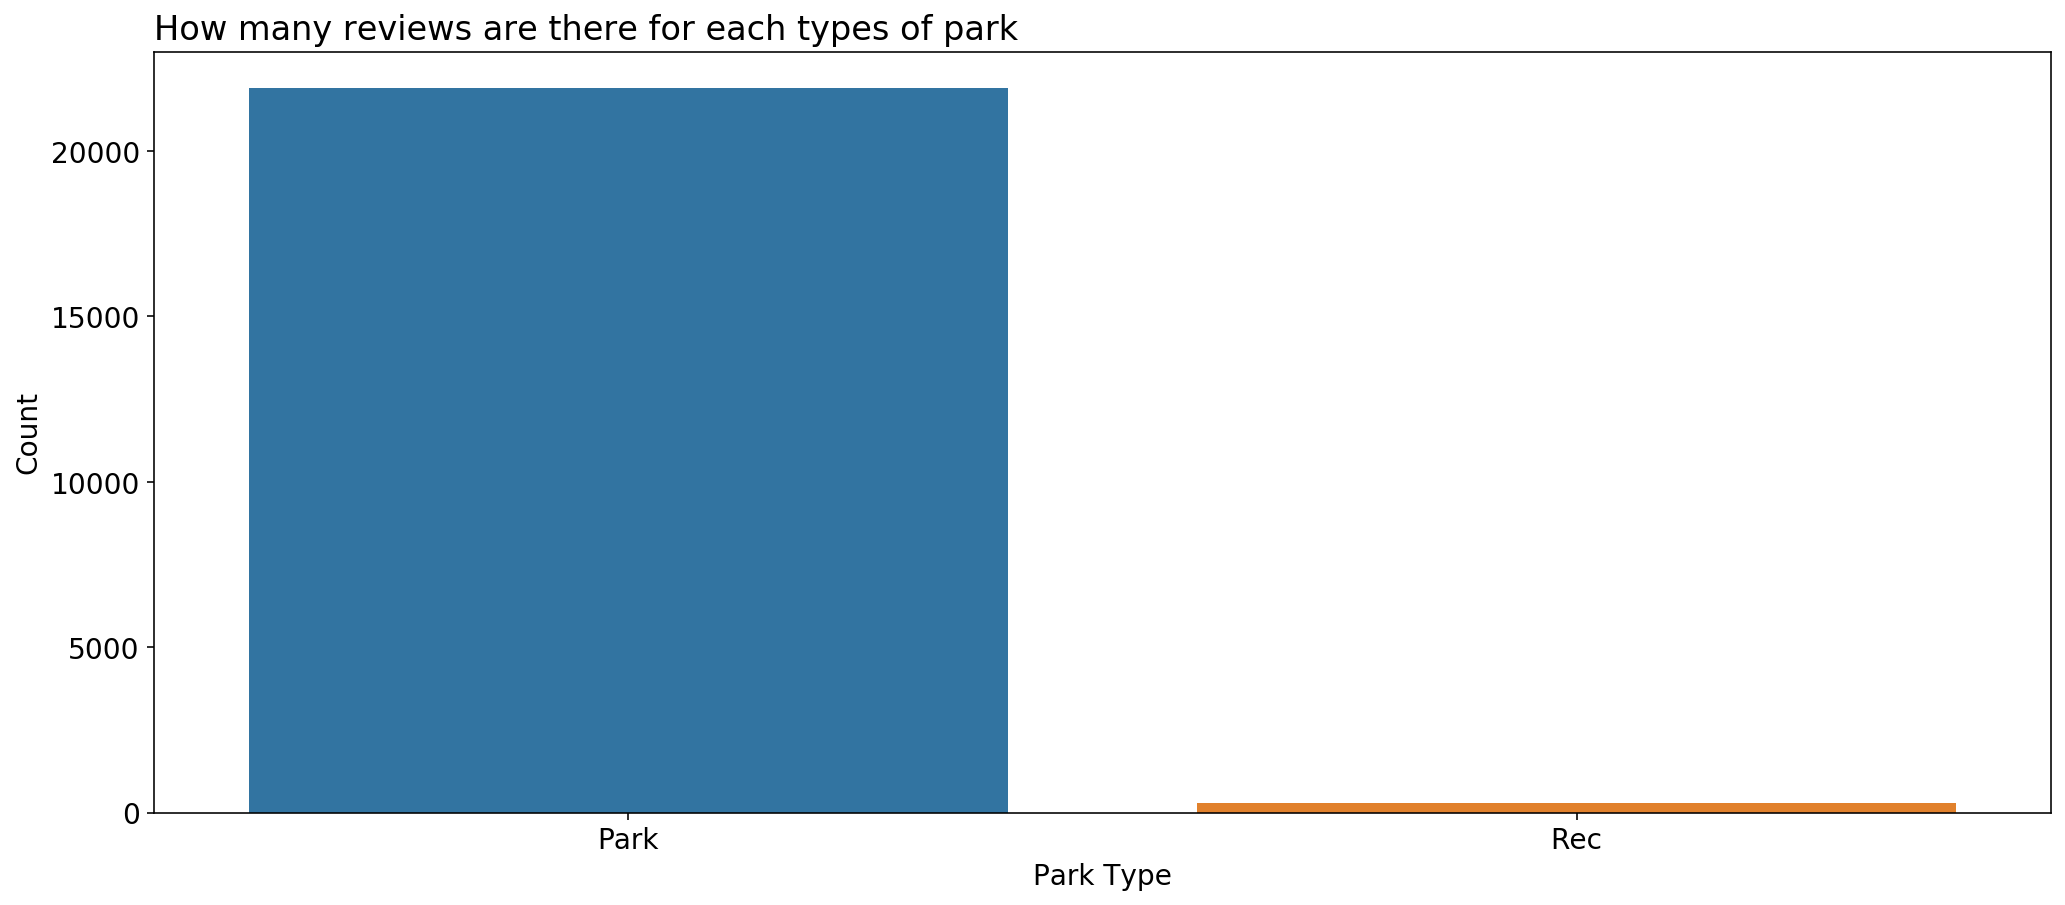

In [268]:
#Plot Count
data = [['Park', review_count_park], ['Rec', review_count_rec]]
df = pd.DataFrame(data, columns = ['Park Type', 'Count'])

ax = sns.barplot(x="Park Type", y="Count", data=df)
plt.title('How many reviews are there for each types of park', loc='left')

4.0211538461538465 4.0588235294117645


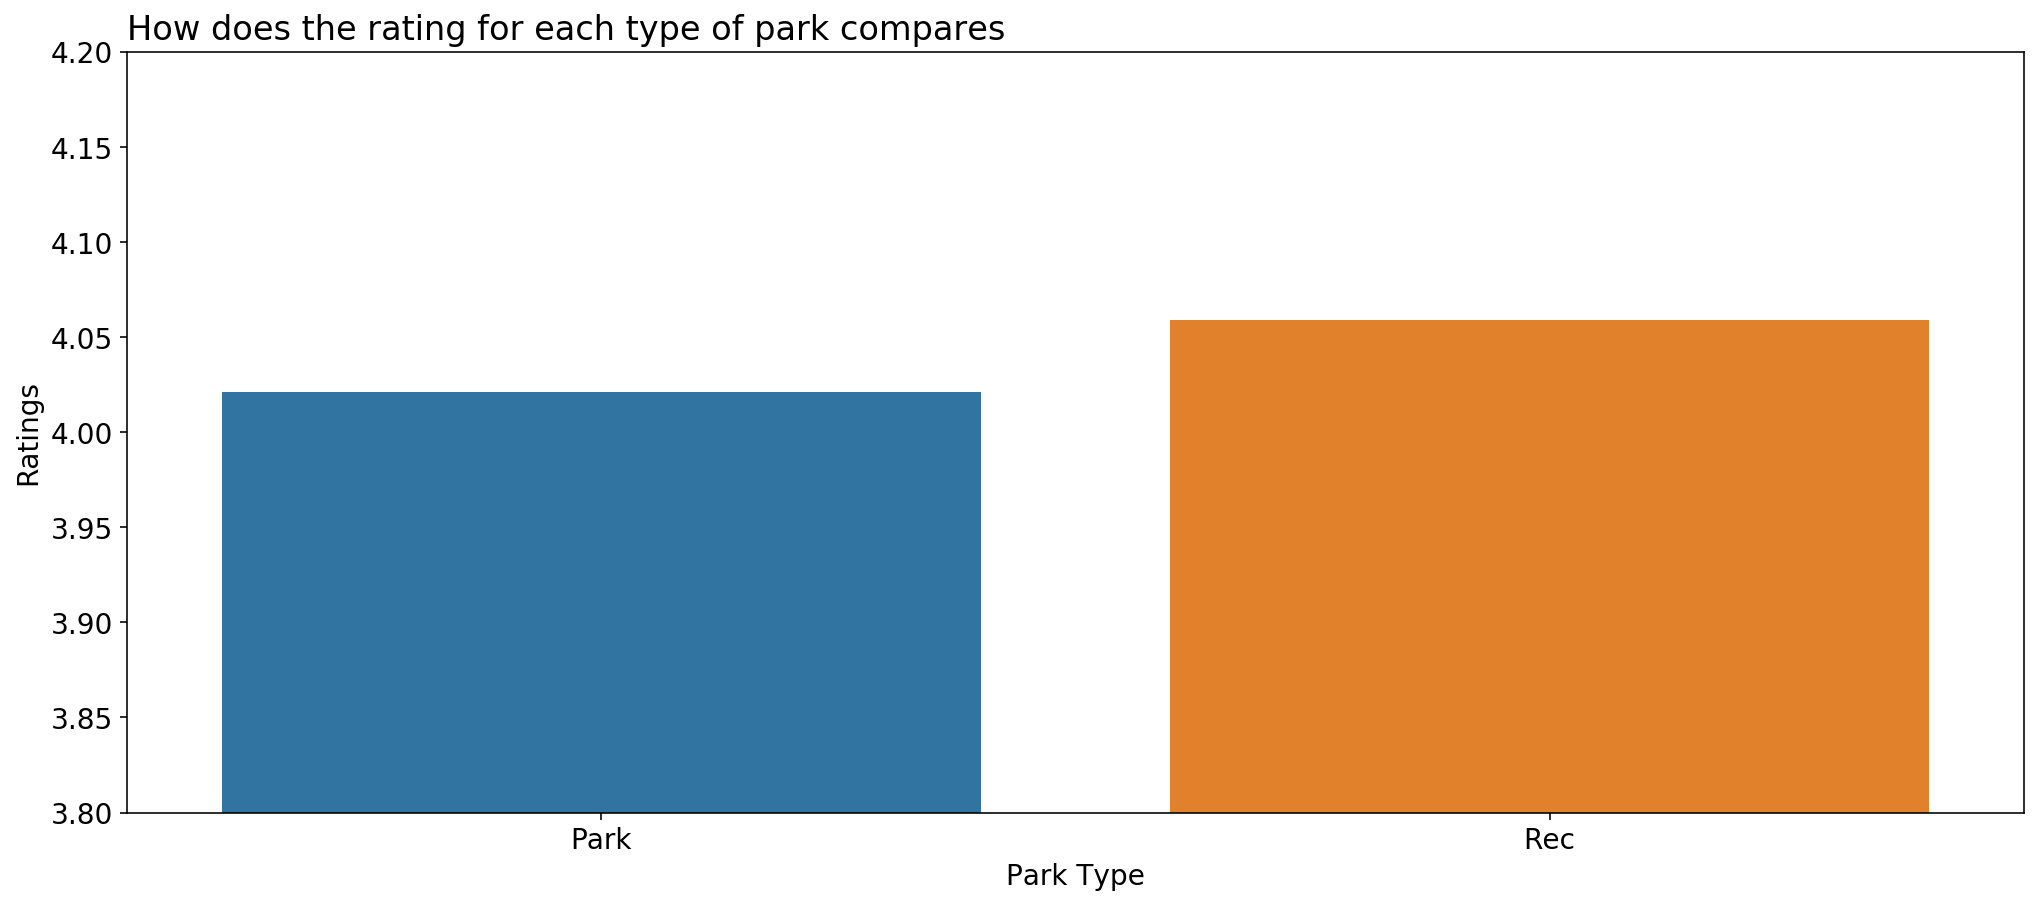

In [266]:
#Plot ratings
rating = [['Park', mean_rate_park], ['Rec', mean_rate_rec]]
df2 = pd.DataFrame(rating, columns = ['Park Type', 'Ratings'])

ax2 = sns.barplot(x="Park Type", y="Ratings", data=df2)
plt.ylim(3.8, 4.2)
plt.title('How does the rating for each type of park compares', loc='left')
print(mean_rate_park, mean_rate_rec)

In [261]:
from scipy.stats import ttest_ind

cat1 = yelp_park_no_other[yelp_park_no_other['type']=='Park']
cat2 = yelp_park_no_other[yelp_park_no_other['type']=='Rec']

ttest_ind(cat1['rating'], cat2['rating'])

Ttest_indResult(statistic=-0.20753111524549894, pvalue=0.8357486935656361)

In [228]:
## Sentimental Analysis

#Tokenization
from nltk.tokenize import word_tokenize

In [231]:
#Tokenize reviews
#tokenized_review = word_tokenize(yelp_review_no_other.loc[3,'text'])
yelp_review_no_other['txt_token'] = yelp_review_no_other['text'].apply(word_tokenize)
yelp_review_no_other

,id,rating,text,type,txt_token
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,Park,"[Balboa, Park, is, a, must, see, when, coming,..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,Park,"[Beautiful, grounds, even, to, take, a, stroll..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,Park,"[Beautiful, sightseeing, in, San, Diego, ., Lo..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,Park,"[Was, invited, to, child, 's, B-Day, party, pr..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",Park,"[Pretty, nice, park, ,, beautiful, design, ., ..."
...,...,...,...,...,...
2327,Petco Park,3,It's shmokay. Brick walls and you can't see in...,Park,"[It, 's, shmokay, ., Brick, walls, and, you, c..."
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...,Park,"[I, have, visited, over, 27, MLB, Ballparks, i..."
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...,Park,"[No, grass, here, but, it, 's, a, great, dog, ..."
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t...",Park,"[I, love, taking, our, cholate, lab, here, ,, ..."


In [234]:
# Remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
yelp_review_no_other['txt_stop'] = yelp_review_no_other['txt_token'].apply(lambda x: [item for item in x if item not in stop_words])
yelp_review_no_other.head()

,id,rating,text,type,txt_token,txt_stop
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,Park,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,Park,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,Park,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,Park,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",Park,"[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ..."


In [235]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

yelp_review_no_other['txt_stem'] = yelp_review_no_other['txt_stop'].apply(lambda x: [ps.stem(y) for y in x])
yelp_review_no_other.head()

,id,rating,text,type,txt_token,txt_stop,txt_stem
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,Park,"[Balboa, Park, is, a, must, see, when, coming,...","[Balboa, Park, must, see, coming, San, Diego, ...","[balboa, park, must, see, come, san, diego, .,..."
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,Park,"[Beautiful, grounds, even, to, take, a, stroll...","[Beautiful, grounds, even, take, stroll, Covid...","[beauti, ground, even, take, stroll, covid, 's..."
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,Park,"[Beautiful, sightseeing, in, San, Diego, ., Lo...","[Beautiful, sightseeing, San, Diego, ., Lots, ...","[beauti, sightse, san, diego, ., lot, walkway,..."
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,Park,"[Was, invited, to, child, 's, B-Day, party, pr...","[Was, invited, child, 's, B-Day, party, pre, C...","[wa, invit, child, 's, b-day, parti, pre, covi..."
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",Park,"[Pretty, nice, park, ,, beautiful, design, ., ...","[Pretty, nice, park, ,, beautiful, design, ., ...","[pretti, nice, park, ,, beauti, design, ., any..."


In [258]:
#Showing what is the most common word in the reviews
#review = yelp_review_no_other['txt_stem'].apply(pd.Series).stack()

#from nltk.probability import FreqDist
#import string

# calculation word frequency
#fdist_review = FreqDist(review)

# remove punctuation counts
#for punc in string.punctuation:
#    del fdist_review[punc]

#fdist_review.plot(20, cumulative=False)

In [239]:
# Compare sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [240]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [245]:
#Seperate Park and rec
review_park = yelp_review_no_other[yelp_review_no_other['type'] == 'Park']
review_rec = yelp_review_no_other[yelp_review_no_other['type'] == 'Rec']

#Create list 
review_list_park = list(review_park['text'].values)
review_list_rec = list(review_rec['text'].values)
review_list_park

["Balboa Park is a must see when coming to San Diego. If you are a resident, it's nice to realize that every time you do come here, there are different things...",
 "Beautiful grounds even to take a stroll during Covid it's a great place to walk and explore bring your dog they are welcome.",
 'Beautiful sightseeing in San Diego. Lots of walkways and gorgeous architecture. Lovely landscapes and picturesque views all around. \nThe weather was utterly...',
 "Was invited to child's B-Day party pre Covid-19.\nThis park is EXCELLENT! Lots of areas for different groups, family friendly and loads of things and...",
 "Pretty nice park, beautiful design.  Anyone is welcome to stroll through the new park and it's just a very relaxing area.  Nice place to work out.  Hope...",
 'We love Civita Park for its wide open spaces to bring my son to ride his bike and scooter in safety. We were excited for the opening of the new playground...',
 "After eating brunch in Little Italy, we decided to walk to Wa

In [246]:
# get sentiment measures
park_sentiments = get_sentiments(review_list_park)
rec_sentiments = get_sentiments(review_list_rec)

In [263]:
park_sentiments.describe()
rec_sentiments.describe()
mean_park_sent = park_sentiments['compound'].mean()
mean_rec_sent = rec_sentiments['compound'].mean()
print(mean_park_sent, mean_rec_sent)

0.4790599469496017 0.5105879999999999


Text(0.0, 1.0, 'How does the sentiment score of reviews for each type of park compares')

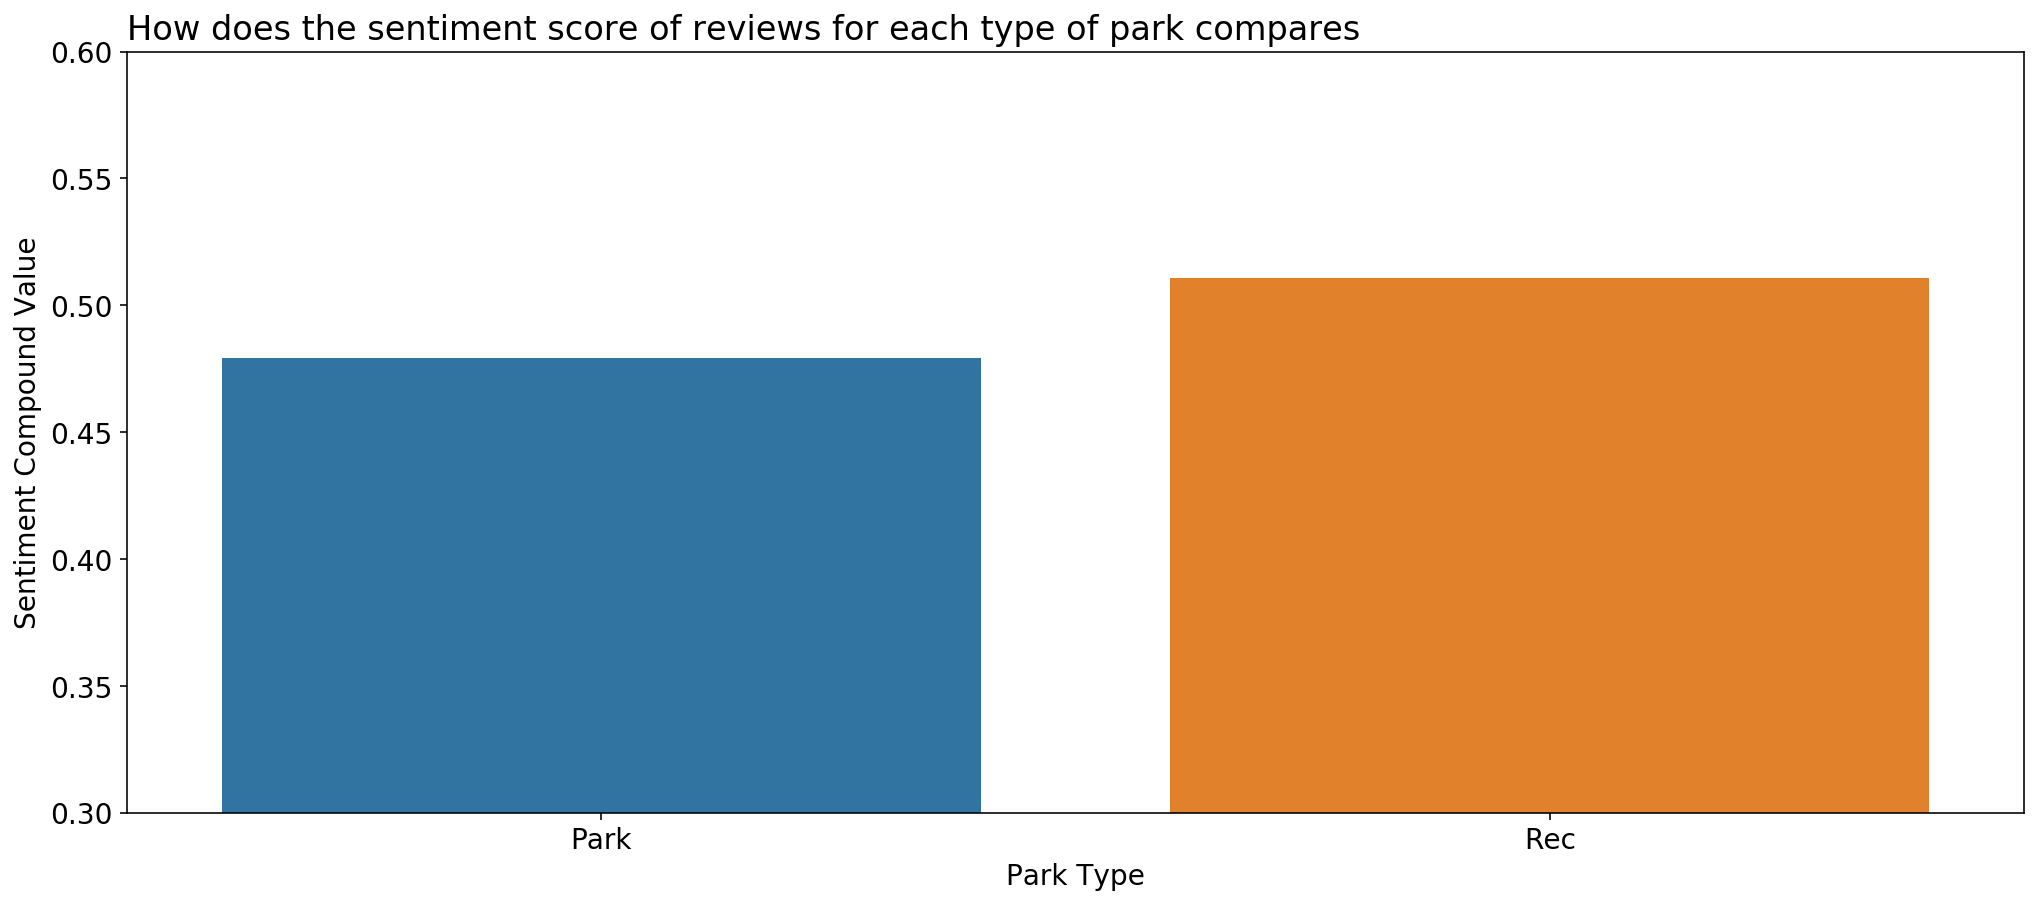

In [265]:
#Plot the stentiment scores
#Plot ratings
sent = [['Park', mean_park_sent], ['Rec', mean_rec_sent]]
df3 = pd.DataFrame(sent, columns = ['Park Type', 'Sentiment Compound Value'])

ax2 = sns.barplot(x="Park Type", y="Sentiment Compound Value", data=df3)
plt.ylim(0.3, 0.6)
plt.title('How does the sentiment score of reviews for each type of park compares', loc='left')

In [262]:
ttest_ind(park_sentiments['compound'], rec_sentiments['compound'])

Ttest_indResult(statistic=-0.34736102218690984, pvalue=0.7284141788803498)

# Ethics & Privacy

There should not be any ethical issues with this data analysis method as all responses have no names attached to them and it is just their views on the park. The dataset I receive to complete this assignment is already been processed to remove all personally identifiable information so privacy can be guaranteed. I do not foresee there are any ethical concerns about the usage of the data generated from my project as it is just a representation of people’s opinions that they choose to make public. They are only informative data that the city can use to better serve the community. 

# Conclusion & Discussion

From the sentimental analysis, the reviews for the parks and recreation center in San Diego are both positive. However, the reviews are more positive for recreation centers than the parks as seen in higher average rating for recreational centers at 4.06 compares to 4.02. And also, the sentiment value for reviews of recreation centers is higher at 0.51 than the sentiment value for reviews of parks at 0.48. Although, with further analysis and running a t-test on the two values, there is no statistical significance to the difference between the average ratings and the average sentiment of the reviews (p-value of 0.84 and 0.73 respectively). I do have to mention that this analysis has some shortcomings which are that there are many more reviews for parks than there are for recreational centers. There are also many more parks than recreational centers in San Diego and the dataset. This means that our sample size of reviews for recreation centers is lacking and the data generated may not be as conclusive and generalizable. This could also mean that people prefer to go to parks than to recreational centers since there are much more reviews for parks than recreational centers. There could also be a confounding variable created by the source of the dataset as in this is a voluntary response, the sample could have biases where more strong negative or more strong positive reviews outnumber the more neutral reviews as people with those opinions are less likely to write a review. Also, Yelp reviews include visitors and locals so this may bias parks as those are more generally where visitors go. In conclusion, there are no statistically significant data to show a preference toward parks or recreational centers meaning both types of public spaces are valued by the public and the hypothesis is disproven. Further research is needed to be done on the usage of each public facility to better understand how the public utilizes these resources. 